In [145]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import __version__ as sklearn_version
from matplotlib import __version__ as mpl_version
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import pickle as pkl 
sns.set()
print("Package Versions")
print("scikit-learn:", sklearn_version)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", mpl_version)

Package Versions
scikit-learn: 0.23.2
numpy: 1.19.2
pandas: 1.1.3
matplotlib: 3.3.2


In [69]:
iris = load_iris()
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [70]:
iris.frame

In [71]:
X, y = iris.data, iris.target

In [83]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [86]:
iris_df = pd.DataFrame(X, columns=iris["feature_names"])
iris_df["Class"] = y
iris_df["Class"].replace({i : name for i, name in enumerate(iris.target_names)}, inplace=True)

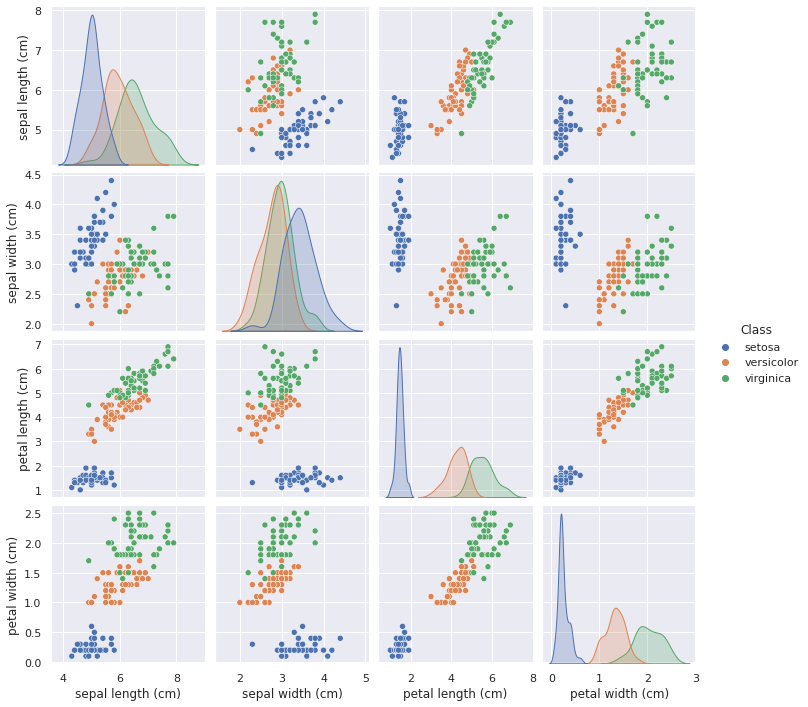

In [87]:
fig = sns.pairplot(data=iris_df, hue="Class")

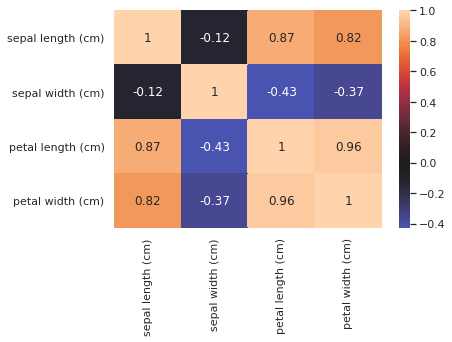

In [114]:
corr = sns.heatmap(iris_df.corr(), annot=True, center=0)

In [63]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

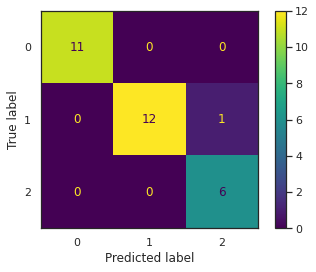

In [112]:
clf = Pipeline([
    # ('Standarization', StandardScaler()),
    ('Model', LogisticRegression(solver='newton-cg'))
])
# clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)
scores = pd.DataFrame({'Cross Validation Accuracy': cross_val_score(clf, X_train, y_train)})
scores['holdout accuracy'] = clf.score(X_test, y_test)
with sns.axes_style('white'):
    fig = plot_confusion_matrix(clf, X_test, y_test)

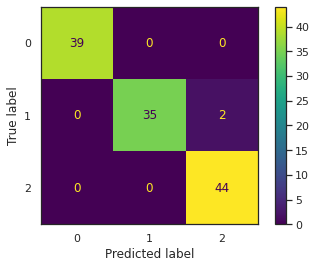

In [113]:
with sns.axes_style('white'):
    fig = plot_confusion_matrix(clf, X_train, y_train)

In [56]:
scores.describe().round(4)

,Cross Validation Accuracy,holdout accuracy
count,5.0000,5.0000
mean,0.9667,0.9667
std,0.0186,0.0000
min,0.9583,0.9667
25%,0.9583,0.9667
50%,0.9583,0.9667
75%,0.9583,0.9667
max,1.0000,0.9667


In [110]:
pd.DataFrame(clf[-1].coef_, columns=iris.feature_names, index=iris.target_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.434498,0.823873,-2.350934,-0.967976
versicolor,0.619053,-0.427337,-0.205895,-0.831348
virginica,-0.184555,-0.396536,2.556828,1.799324


In [33]:
with open("iris_logreg.pkl", "wb") as model_output:
    pkl.dump(clf, model_output)

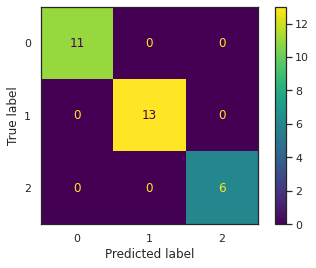

In [140]:
clf = Pipeline([
    # ('Standarization', StandardScaler()),
    ('Model', SVC(kernel='linear', random_state = 42))
])
# clf = LogisticRegression(solver='newton-cg')
clf.fit(X_train, y_train)
scores = pd.DataFrame({'Cross Validation Accuracy': cross_val_score(clf, X_train, y_train)})
scores['holdout accuracy'] = clf.score(X_test, y_test)
with sns.axes_style('white'):
    fig = plot_confusion_matrix(clf, X_test, y_test)

In [141]:
scores.describe().round(4)

,Cross Validation Accuracy,holdout accuracy
count,5.0000,5.0
mean,0.9833,1.0
std,0.0228,0.0
min,0.9583,1.0
25%,0.9583,1.0
50%,1.0000,1.0
75%,1.0000,1.0
max,1.0000,1.0
